In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
from torch.autograd import Variable
import os
import numpy as np
from tqdm import tqdm
import argparse
import random
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_recall_curve, auc
import sys
import os

from collections import OrderedDict
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [2]:
simband_ppg_roc_auc = [ 
[0.879, 0.878, 0.881],
[0.891,0.889, 0.892],
[0.914,0.913, 0.916],
[0.870,0.868, 0.871],
]
simband_ppg_pr_auc = [ 
[0.841,0.838, 0.843],
[0.847,0.844, 0.845],
[0.865,0.868, 0.868],
[0.799, 0.796, 0.803],
]
ucla_ppg_roc_auc = [ 
[0.918,0.916, 0.92],
[0.92,0.918, 0.922],
[0.924,0.922, 0.925],
[0.872, 0.87, 0.875],
]

ucla_ppg_pr_auc = [ 
[0.768,0.762, 0.774],
[0.778,0.772, 0.784],
[0.773,0.768, 0.779],
[0.607,0.601, 0.614],
]


stanford_roc_auc = [ 
[0.763,0.761, 0.764],
[0.764,0.763, 0.766],
[0.877,0.876, 0.878],
[0.883,0.882, 0.884],
]
stanford_pr_auc = [ 
[0.582,0.577, 0.586],
[0.613,0.609, 0.617],
[0.726,0.723, 0.73],
[0.726, 0.722, 0.729],
]

simband_ecg_roc_auc = [
[0.724,0.722, 0.727],
[0.721,0.718, 0.723],
[0.747,0.744, 0.75],
]

simband_ecg_pr_auc = [
     
[0.621,0.617, 0.625],
[0.675,0.671, 0.679],
[0.732,0.729, 0.736],
]

ucla_ecg_roc_auc = [
      
[0.89, 0.887, 0.893],
[0.905,0.902, 0.908],
[0.927,0.925, 0.929],
]

ucla_ecg_pr_auc = [
      
[0.726,0.72, 0.732],
[0.749,0.743, 0.755],
[0.765,0.759, 0.772],
]

In [6]:
# plt.clf()
# plt.figure(figsize=(10, 10))

# # colors = ['#46237a', '#42ab8a', '#f9961e', '#f2712d', '#f94045']
# colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

# methods = [
# 'ResNet-34 (PPG)',
# 'Deep Mut.',
# 'SiamAF',
# 'DeepBeat'
# ]

# fig = plt.figure()
# # fig.suptitle('PPG dataset comparison AUROC-AUPRC')
# ax1 = fig.add_subplot()
# ax2 = ax1.twinx()

# ax1.scatter(simband_ppg_pr_auc[0][0], simband_ppg_roc_auc[0][0], marker='^', label='Simband Dataset', c='w', edgecolor='gray', s=50)
# ax1.scatter(ucla_ppg_pr_auc[0][0], ucla_ppg_roc_auc[0][0], marker='.', label='Institution B Dataset', c='w', edgecolor='gray', s=50)
# ax1.scatter(stanford_pr_auc[0][0], stanford_roc_auc[0][0], marker='*', label='Stanford Dataset', c='w', edgecolor='gray', s=50)



# ax1.legend(title="Datasets", loc='upper left')


# for i in range(len(methods)):
    
#     print(methods[i])
#     edgecolors=None
    
# #     ax2.plot([simband_ppg_pr_auc[i][0], simband_ppg_pr_auc[i][0]], [simband_ppg_roc_auc[i][1], simband_ppg_roc_auc[i][2]], color='gray')
# #     ax2.plot([simband_ppg_pr_auc[i][1], simband_ppg_pr_auc[i][2]], [simband_ppg_roc_auc[i][0], simband_ppg_roc_auc[i][0]], color='gray')
    
# #     ax2.plot([ucla_ppg_pr_auc[i][0], ucla_ppg_pr_auc[i][0]], [ucla_ppg_roc_auc[i][1], ucla_ppg_roc_auc[i][2]], color='gray')
# #     ax2.plot([ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2]], [ucla_ppg_roc_auc[i][0], ucla_ppg_roc_auc[i][0]], color='gray')
    
# #     ax2.plot([stanford_pr_auc[i][0], stanford_pr_auc[i][0]], [stanford_roc_auc[i][1], stanford_roc_auc[i][2]], color='gray')
# #     ax2.plot([stanford_pr_auc[i][1], stanford_pr_auc[i][2]], [stanford_roc_auc[i][0], stanford_roc_auc[i][0]], color='gray')
    
#     ax2.scatter(simband_ppg_pr_auc[i][0], simband_ppg_roc_auc[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=edgecolors, s=50)
#     ax2.scatter(ucla_ppg_pr_auc[i][0], ucla_ppg_roc_auc[i][0], marker='o', label=methods[i], color=colors[i], edgecolors=edgecolors, s=50)
#     ax2.scatter(stanford_pr_auc[i][0], stanford_roc_auc[i][0], marker='*', label=methods[i], color=colors[i], edgecolors=edgecolors, s=50)
    
    
# patches = []
# for i in range(len(methods)):
#     edgecolors=None      
#     patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

# legend_properties = {'weight':'bold'}

# plt.legend(handles=patches, loc='lower right', title="Method")

# ax1.set_xlabel('AUPRC')
# ax1.set_ylabel('AUROC')

# ax1.set_xlim(0.5, 0.95)
# ax1.set_ylim(0.75, 0.95)
# ax2.set_xlim(0.5, 0.95)
# ax2.set_ylim(0.75, 0.95)
# # ax1.set_xlim(0.5, 0.95)
# # ax1.set_ylim(0.5, 0.95)
# # ax2.set_xlim(0.5, 0.95)
# # ax2.set_ylim(0.5, 0.95)
# ax2.axis('off')



# # plt.show()
# plt.savefig('result_plots/ppg_comparisons.png', dpi=300)

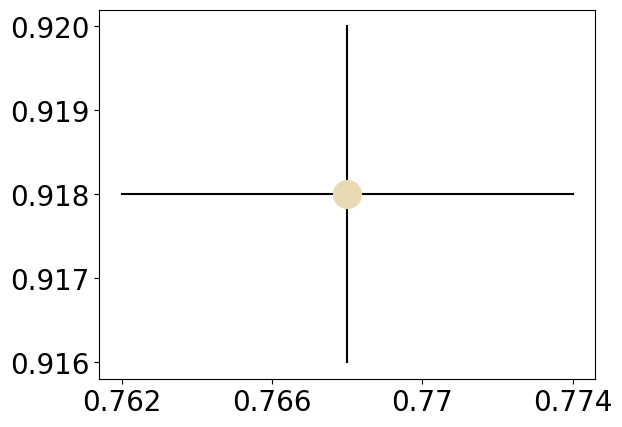

In [46]:
colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

i = 0
plt.plot([ucla_ppg_pr_auc[i][0], ucla_ppg_pr_auc[i][0]], [ucla_ppg_roc_auc[i][1], ucla_ppg_roc_auc[i][2]], color='k', zorder=0)
plt.plot([ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2]], [ucla_ppg_roc_auc[i][0], ucla_ppg_roc_auc[i][0]], color='k', zorder=0)
plt.scatter(ucla_ppg_pr_auc[i][0], ucla_ppg_roc_auc[i][0], color=colors[i], s=400)

plt.xticks(np.arange(ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2], 0.004), np.arange(ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2], 0.004))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.savefig('result_plots/zomin.png', dpi=300)



In [42]:
np.arange(ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2], 0.004)

array([0.762, 0.766, 0.77 , 0.774])

<Figure size 640x480 with 0 Axes>

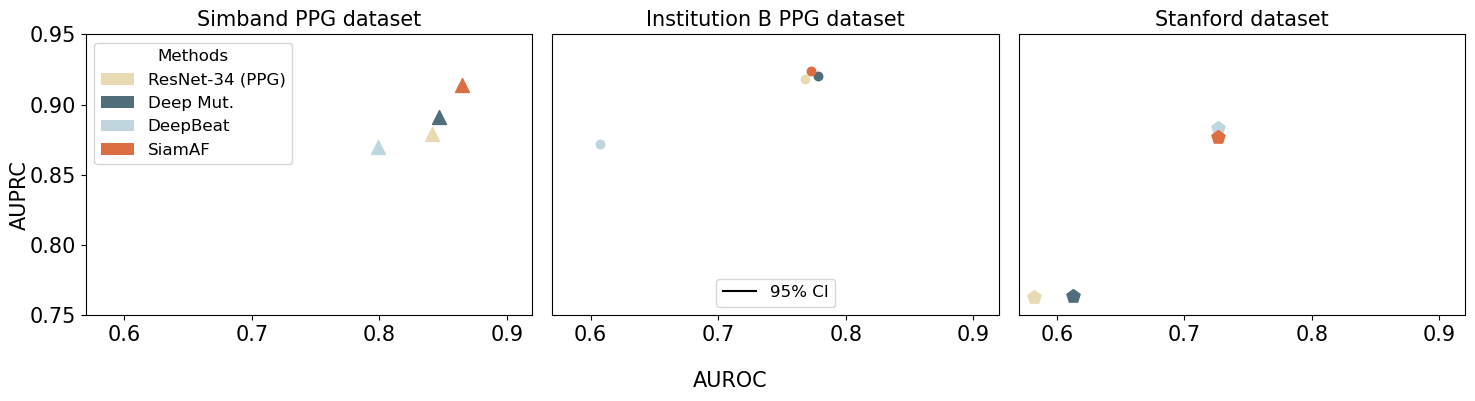

In [35]:
colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

methods = [
'ResNet-34 (PPG)',
'Deep Mut.',
'SiamAF',
'DeepBeat'
]

plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.setp(axs, xlim=(0.57, 0.92), ylim=(0.75, 0.95))



for i in [0, 1, 3, 2]:
    axs[0].scatter(simband_ppg_pr_auc[i][0], simband_ppg_roc_auc[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=None, s=100)
    axs[0].set_title('Simband PPG dataset', fontsize = 15)
for i in [0, 1, 3, 2]:
    axs[1].scatter(ucla_ppg_pr_auc[i][0], ucla_ppg_roc_auc[i][0], marker='.', color=colors[i], edgecolors=None, s=150)
#     axs[1].axes.get_yaxis().set_visible(False)
    axs[1].set_title('Institution B PPG dataset', fontsize = 15)

    
for i in [0, 1, 3, 2]:
    axs[2].scatter(stanford_pr_auc[i][0], stanford_roc_auc[i][0], marker='p', label=methods[i], color=colors[i], edgecolors=None, s=100)
#     axs[2].axes.get_yaxis().set_visible(False)
    axs[2].set_title('Stanford dataset', fontsize = 15)
    
axs[1].yaxis.set_visible(False) 
axs[2].yaxis.set_visible(False) 
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='both', which='minor', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='minor', labelsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='both', which='minor', labelsize=15)
     
patches = []
for i in [0, 1, 3, 2]:
    edgecolors=None      
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

#'weight':'bold'
legend_properties = {'size':12}

legend = axs[0].legend(handles=patches, title='Methods', loc='upper left', prop=legend_properties)
axs[1].plot((ucla_ppg_pr_auc[i][0], ucla_ppg_pr_auc[i][0]), (ucla_ppg_roc_auc[i][0], ucla_ppg_roc_auc[i][0]), label='95% CI', color='k', zorder=0)
axs[1].legend(loc='lower center', prop=legend_properties)



# axs[2].set_yticks(np.arange(0.76, 0.89, 0.02), [round(x, 2) for x in np.arange(0.76, 0.89, 0.02)])

# from matplotlib.ticker import FormatStrFormatter
# axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[2].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.supxlabel('AUROC', fontsize=15)
fig.supylabel('AUPRC', fontsize=15)

plt.tight_layout()

plt.setp(legend.get_title(),fontsize='12')
plt.savefig('result_plots/ppg_comparisons_v2.png', dpi=300)




<Figure size 640x480 with 0 Axes>

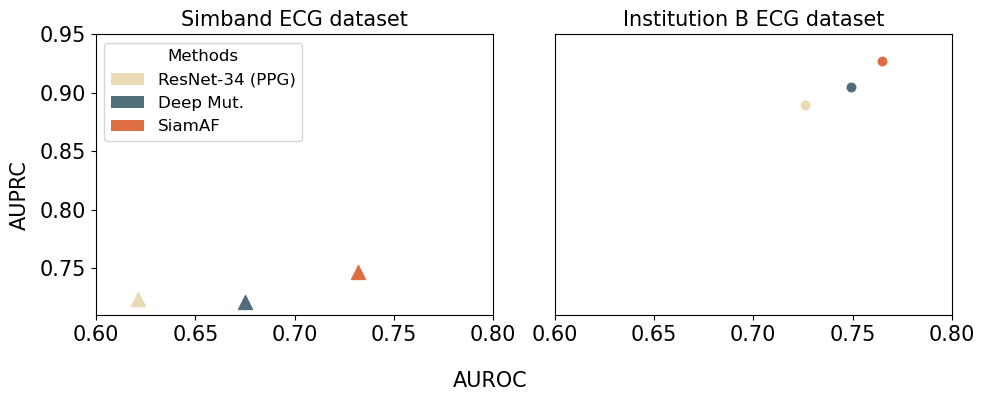

In [36]:
colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

methods = [
'ResNet-34 (PPG)',
'Deep Mut.',
'SiamAF',
]

plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.setp(axs, xlim=(0.6, 0.8), ylim=(0.71, 0.95))



for i in range(len(methods)):
    axs[0].scatter(simband_ecg_pr_auc[i][0], simband_ecg_roc_auc[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=None, s=100)
    axs[0].set_title('Simband ECG dataset', fontsize = 15)
for i in range(len(methods)):
    axs[1].scatter(ucla_ecg_pr_auc[i][0], ucla_ecg_roc_auc[i][0], marker='.', label=methods[i], color=colors[i], edgecolors=None, s=150)
    axs[1].set_title('Institution B ECG dataset', fontsize = 15)
    
axs[0].legend(title='Methods', loc='upper left')

axs[1].yaxis.set_visible(False) 

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='both', which='minor', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='minor', labelsize=15)
# from matplotlib.ticker import FormatStrFormatter
# axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# axs[2].set_yticks(np.arange(0.76, 0.89, 0.02), [round(x, 2) for x in np.arange(0.76, 0.89, 0.02)])


patches = []
for i in range(len(methods)):
    edgecolors=None      
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

legend_properties = {'size':12}

fig.supxlabel('AUROC', fontsize=15)
fig.supylabel('AUPRC', fontsize=15)


legend = axs[0].legend(handles=patches, title='Methods', loc='upper left', prop=legend_properties)
plt.setp(legend.get_title(),fontsize='12')
plt.tight_layout()

plt.savefig('result_plots/ecg_comparisons_v2.png', dpi=300)

In [27]:
# colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

# methods = [
# 'ResNet-34 (PPG)',
# 'Deep Mut.',
# 'SiamAF',
# 'DeepBeat'
# ]

# plt.clf()
# fig, axs = plt.subplots(2, 3, figsize=(8, 4))
# plt.setp(axs, ylim=(0.5, 1))

# axs[0][0].set_ylabel('AURPC')
# axs[1][0].set_ylabel('AUROC')


# for i in range(len(methods)):
#     axs[0][0].bar(i, simband_ppg_pr_auc[i][0], color=colors[i])
#     axs[0][0].plot((i, i), (simband_ppg_pr_auc[i][1], simband_ppg_pr_auc[i][2]), c='k')
#     axs[0][0].set_title('Simband')
    
#     axs[1][0].bar(i, simband_ppg_roc_auc[i][0], color=colors[i])
#     axs[1][0].plot((i, i), (simband_ppg_roc_auc[i][1], simband_ppg_roc_auc[i][2]), c='k')

# for i in range(len(methods)):
#     axs[0][1].bar(i, ucla_ppg_pr_auc[i][0], color=colors[i])
#     axs[0][1].plot((i, i), (ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2]), c='k')
#     axs[0][1].set_title('Institution B')
    
#     axs[1][1].bar(i, ucla_ppg_roc_auc[i][0], color=colors[i])
#     axs[1][1].plot((i, i), (ucla_ppg_roc_auc[i][1], ucla_ppg_roc_auc[i][2]), c='k')
    
# for i in range(len(methods)):
#     axs[0][2].bar(i, stanford_pr_auc[i][0], color=colors[i])
#     axs[0][2].plot((i, i), (stanford_pr_auc[i][1], stanford_pr_auc[i][2]), c='k')
#     axs[0][2].set_title('Stanford')
    
#     axs[1][2].bar(i, stanford_roc_auc[i][0], color=colors[i])
#     axs[1][2].plot((i, i), (stanford_roc_auc[i][1], stanford_roc_auc[i][2]), c='k')
    

In [28]:
# colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

# methods = [
# 'ResNet-34 (PPG)',
# 'Deep Mut.',
# 'Proposed',
# 'DeepBeat'
# ]

# plt.clf()
# fig, axs = plt.subplots(2, 3, figsize=(8, 4))
# plt.setp(axs, ylim=(0.5, 1))

# axs[0][0].set_ylabel('AURPC')
# axs[1][0].set_ylabel('AUROC')

# for idx, rec in enumerate([simband_ppg_pr_auc, ucla_ppg_pr_auc, stanford_pr_auc]):
#     for i in range(len(methods)-1):
#         axs[0][idx].plot((i+1, i+2), (rec[i][0], rec[i+1][1]), color='gray', zorder=0)
# #         axs[0][idx].set_title('Simband')

#     for i in range(len(methods)):
#         axs[0][idx].scatter(i+1, rec[i][0], color=colors[i])
        
# for idx, rec in enumerate([simband_ppg_roc_auc, ucla_ppg_roc_auc, stanford_roc_auc]):
#     for i in range(len(methods)-1):
#         axs[1][idx].plot((i+1, i+2), (rec[i][0], rec[i+1][1]), color='gray', zorder=0)

#     for i in range(len(methods)):
#         axs[1][idx].scatter(i+1, rec[i][0], color=colors[i])

# # for i in range(len(methods)):
# #     axs[0][1].bar(i, ucla_ppg_pr_auc[i][0], color=colors[i])
# #     axs[0][1].plot((i, i), (ucla_ppg_pr_auc[i][1], ucla_ppg_pr_auc[i][2]), c='k')
# #     axs[0][1].set_title('Institution B')
    
# #     axs[1][1].bar(i, ucla_ppg_roc_auc[i][0], color=colors[i])
# #     axs[1][1].plot((i, i), (ucla_ppg_roc_auc[i][1], ucla_ppg_roc_auc[i][2]), c='k')
    
# # for i in range(len(methods)):
# #     axs[0][2].bar(i, stanford_pr_auc[i][0], color=colors[i])
# #     axs[0][2].plot((i, i), (stanford_pr_auc[i][1], stanford_pr_auc[i][2]), c='k')
# #     axs[0][2].set_title('Stanford')
    
# #     axs[1][2].bar(i, stanford_roc_auc[i][0], color=colors[i])
# #     axs[1][2].plot((i, i), (stanford_roc_auc[i][1], stanford_roc_auc[i][2]), c='k')
    

In [10]:
# def enlarge_ci_by_factor(minci, maxci, pos, factor=1):
#     return pos-factor*(pos - minci), factor*(maxci - pos)+pos


# plt.clf()
# plt.figure(figsize=(10, 10))

# colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']
# methods = [
# 'ResNet-34 (ECG)',
# 'Deep Mut.',
# 'Proposed'
# ]

# fig = plt.figure()
# # fig.suptitle('ECG dataset comparison AUROC-AUPRC')
# ax1 = fig.add_subplot()
# ax2 = ax1.twinx()

# ax1.scatter(simband_ecg_pr_auc[0][0], simband_ecg_roc_auc[0][0], marker='^', label='Simband Dataset', c='w', edgecolor='gray', s=100)
# ax1.scatter(ucla_ecg_pr_auc[0][0], ucla_ecg_roc_auc[0][0], marker='o', label='Institution B Dataset', c='w', edgecolor='gray', s=100)


# ax1.legend(title="Datasets", loc='upper left')

# for i in range(len(methods)):
#     edgecolors=None
#     ax2.scatter(simband_ecg_pr_auc[i][0], simband_ecg_roc_auc[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
#     ax2.scatter(ucla_ecg_pr_auc[i][0], ucla_ecg_roc_auc[i][0], marker='o', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    
# #     ax2.text(simband_ecg_pr_auc[i][0], simband_ecg_roc_auc[i][0], f'+-aaa')
# #     ax2.plot([ucla_ecg_pr_auc[i][0], ucla_ecg_pr_auc[i][0]], enlarge_ci_by_factor(ucla_ecg_roc_auc[i][1], ucla_ecg_roc_auc[i][2], ucla_ecg_roc_auc[i][0]), color='k', zorder=0,  solid_capstyle='round')
# #     ax2.plot(enlarge_ci_by_factor(ucla_ecg_pr_auc[i][1], ucla_ecg_pr_auc[i][2], ucla_ecg_pr_auc[i][0]), [ucla_ecg_roc_auc[i][0], ucla_ecg_roc_auc[i][0]], color='k', zorder=0,  solid_capstyle='round')

# #     ax2.plot([simband_ecg_pr_auc[i][0], simband_ecg_pr_auc[i][0]], [simband_ecg_roc_auc[i][1], simband_ecg_roc_auc[i][2]], color='k', zorder=0,  solid_capstyle='round')
# #     ax2.plot([simband_ecg_pr_auc[i][1], simband_ecg_pr_auc[i][2]], [simband_ecg_roc_auc[i][0], simband_ecg_roc_auc[i][0]], color='k', zorder=0,  solid_capstyle='round')
    
# patches = []
# for i in range(len(methods)):
#     edgecolors=None         
#     patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

# plt.legend(handles=patches, loc='lower left', title="Method")

# ax2.axis('off')
# ax1.set_xlabel('AUPRC')
# ax1.set_ylabel('AUROC')


# ax1.set_xlim(0.5, 0.95)
# ax1.set_ylim(0.5, 0.95)
# ax2.set_xlim(0.5, 0.95)
# ax2.set_ylim(0.5, 0.95)
# ax2.axis('off')

# ax1.set_xticks(np.arange(0.5, 0.95, 0.04), np.round(np.arange(0.5, 0.95, 0.04), 2))

# # plt.show()
# plt.savefig('result_plots/ecg_comparisons.png', dpi=300)

In [37]:
simband_ppg_roc_auc_label01 = [  
[0.5,0.5, 0.5],
[0.458, 0.456, 0.459],
[0.9,0.898, 0.901],

]
simband_ppg_pr_auc_label01 = [  
[0.703,0.702, 0.705],
[0.349, 0.345, 0.352,],
[0.841, 0.838, 0.844],
]
ucla_ppg_roc_auc_label01 = [  
[0.5, 0.5, 0.5],
[0.425, 0.423, 0.426],
[0.907, 0.905, 0.909],
]

ucla_ppg_pr_auc_label01 = [ 
[0.167, 0.164, 0.171],
[0.11, 0.109, 0.112,],
[0.744, 0.739, 0.749],
]

stanford_pr_auc_label01 = [  
[0.196, 0.193, 0.2,],
[0.161, 0.159,0.163],
[0.565,0.56, 0.569],

]
stanford_roc_auc_label01 = [  
[0.5,0.5, 0.5],
[0.433,0.432, 0.434],
[0.8,0.799, 0.801],
]

simband_ecg_roc_auc_label01 = [
[0.509, 0.509, 0.51],
[0.5,0.5, 0.5],
[0.729,0.726, 0.732],
]

simband_ecg_pr_auc_label01 = [
[0.401,0.393, 0.41],
[0.703,0.702, 0.705],
[0.661,0.658, 0.665],
]

ucla_ecg_roc_auc_label01 = [
[0.491,0.49, 0.492],
[0.5,0.5, 0.5],
[0.899, 0.897, 0.902],
]

ucla_ecg_pr_auc_label01 = [
[0.194, 0.19,0.198],
[0.571,0.57, 0.572],
[0.736,0.731, 0.742],
]

<Figure size 640x480 with 0 Axes>

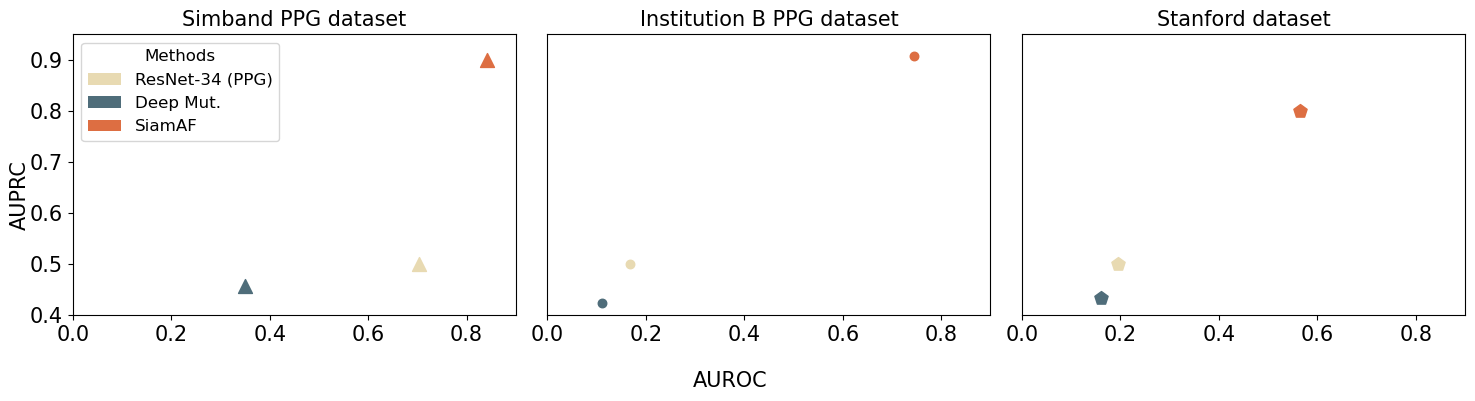

In [41]:
colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

methods = [
'ResNet-34 (PPG)',
'Deep Mut.',
'SiamAF',
]

plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.setp(axs, xlim=(0.0, 0.9), ylim=(0.4, 0.95))



for i in range(len(methods)):
    axs[0].scatter(simband_ppg_pr_auc_label01[i][0], simband_ppg_roc_auc_label01[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=None, s=100)
    axs[0].set_title('Simband PPG dataset',  fontsize = 15)
for i in range(len(methods)):
    axs[1].scatter(ucla_ppg_pr_auc_label01[i][0], ucla_ppg_roc_auc_label01[i][0], marker='.', label=methods[i], color=colors[i], edgecolors=None, s=150)
#     axs[1].axes.get_yaxis().set_visible(False)
    axs[1].set_title('Institution B PPG dataset',  fontsize = 15)

    
for i in range(len(methods)):
    axs[2].scatter(stanford_pr_auc_label01[i][0], stanford_roc_auc_label01[i][0], marker='p', label=methods[i], color=colors[i], edgecolors=None, s=100)
#     axs[2].axes.get_yaxis().set_visible(False)
    axs[2].set_title('Stanford dataset',  fontsize = 15)

axs[2].yaxis.set_visible(False) 
axs[1].yaxis.set_visible(False) 

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='both', which='minor', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='minor', labelsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='both', which='minor', labelsize=15)
  
     
patches = []
for i in range(len(methods)):
    edgecolors=None      
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

legend_properties = {'size':12}

fig.supxlabel('AUROC', fontsize=15)
fig.supylabel('AUPRC', fontsize=15)

legend = axs[0].legend(handles=patches, title='Methods', loc='upper left', prop=legend_properties)
plt.setp(legend.get_title(),fontsize='12')
plt.tight_layout()

plt.savefig('result_plots/ppg_comparisons_1perc_v2.png', dpi=300)

<Figure size 640x480 with 0 Axes>

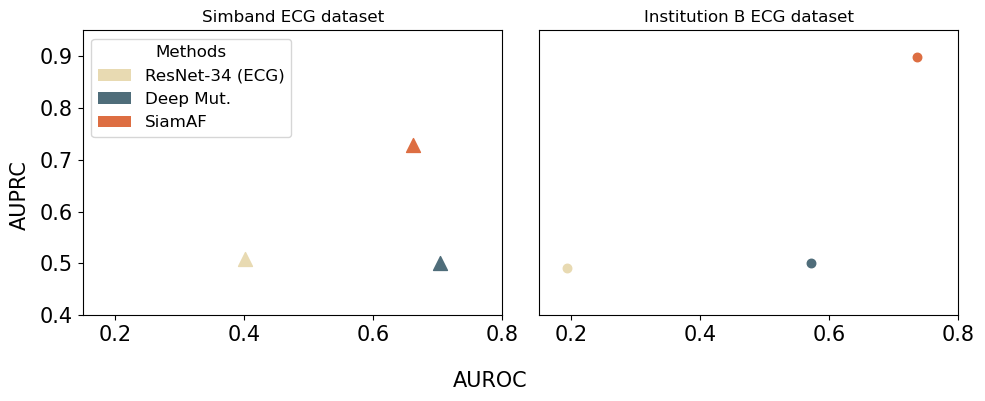

In [44]:
colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']

methods = [
'ResNet-34 (ECG)',
'Deep Mut.',
'SiamAF',
]

plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.setp(axs, xlim=(0.15, 0.8), ylim=(0.4, 0.95))



for i in range(len(methods)):
    axs[0].scatter(simband_ecg_pr_auc_label01[i][0], simband_ecg_roc_auc_label01[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=None, s=100)
    axs[0].set_title('Simband ECG dataset')
for i in range(len(methods)):
    axs[1].scatter(ucla_ecg_pr_auc_label01[i][0], ucla_ecg_roc_auc_label01[i][0], marker='.', label=methods[i], color=colors[i], edgecolors=None, s=150)
    axs[1].set_title('Institution B ECG dataset')
    

axs[0].legend(title='Methods', loc='upper left')

axs[1].yaxis.set_visible(False) 

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='both', which='minor', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='minor', labelsize=15)

patches = []
for i in range(len(methods)):
    edgecolors=None      
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

legend_properties = {'size':12}
fig.supxlabel('AUROC', fontsize=15)
fig.supylabel('AUPRC', fontsize=15)

legend = axs[0].legend(handles=patches, title='Methods', loc='upper left', prop=legend_properties)
plt.setp(legend.get_title(),fontsize='12')
plt.tight_layout()

plt.savefig('result_plots/ecg_comparisons_1perc_v2.png', dpi=300)

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

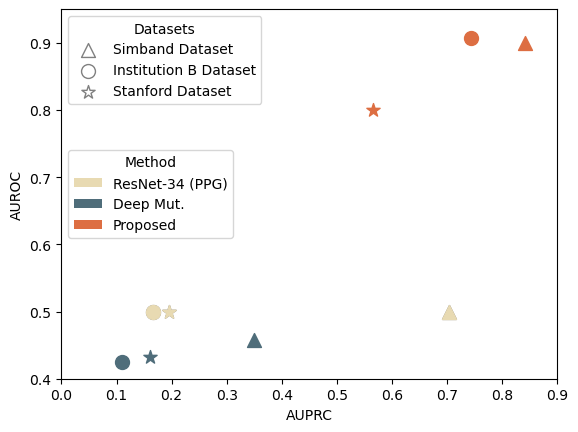

In [104]:
plt.clf()
plt.figure(figsize=(10, 10))

colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']
methods = [
'ResNet-34 (PPG)',
'Deep Mut.',
'SiamAF'
]

fig = plt.figure()
# fig.suptitle('PPG dataset 1% training labels comparison AUROC-AUPRC')
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.scatter(simband_ppg_pr_auc_label01[0][0], simband_ppg_roc_auc_label01[0][0], marker='^', label='Simband Dataset', c='w', edgecolor='gray', s=100)
ax1.scatter(ucla_ppg_pr_auc_label01[0][0], ucla_ppg_roc_auc_label01[0][0], marker='o', label='Institution B Dataset', c='w', edgecolor='gray', s=100)
ax1.scatter(stanford_pr_auc_label01[0][0], stanford_roc_auc_label01[0][0], marker='*', label='Stanford Dataset', c='w', edgecolor='gray', s=100)

ax1.legend(title="Datasets", loc='upper left')

for i in range(len(methods)):
    edgecolors=None
    ax2.scatter(simband_ppg_pr_auc_label01[i][0], simband_ppg_roc_auc_label01[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    ax2.scatter(ucla_ppg_pr_auc_label01[i][0], ucla_ppg_roc_auc_label01[i][0], marker='o', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    ax2.scatter(stanford_pr_auc_label01[i][0], stanford_roc_auc_label01[i][0], marker='*', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    
#     ax2.plot([stanford_pr_auc_label01[i][0], stanford_pr_auc_label01[i][0]], [stanford_roc_auc_label01[i][1], stanford_roc_auc_label01[i][2]], color='gray')
#     ax2.plot([stanford_pr_auc_label01[i][1], stanford_pr_auc_label01[i][2]], [stanford_roc_auc_label01[i][0], stanford_roc_auc_label01[i][0]], color='gray')
    
#     ax2.plot([ucla_ppg_pr_auc_label01[i][0], ucla_ppg_pr_auc_label01[i][0]], [ucla_ppg_roc_auc_label01[i][1], ucla_ppg_roc_auc_label01[i][2]], color='gray')
#     ax2.plot([ucla_ppg_pr_auc_label01[i][1], ucla_ppg_pr_auc_label01[i][2]], [ucla_ppg_roc_auc_label01[i][0], ucla_ppg_roc_auc_label01[i][0]], color='gray')
    
#     ax2.plot([simband_ppg_pr_auc_label01[i][0], simband_ppg_pr_auc_label01[i][0]], [simband_ppg_roc_auc_label01[i][1], simband_ppg_roc_auc_label01[i][2]], color='gray')
#     ax2.plot([simband_ppg_pr_auc_label01[i][1], simband_ppg_pr_auc_label01[i][2]], [simband_ppg_roc_auc_label01[i][0], simband_ppg_roc_auc_label01[i][0]], color='gray')
    
patches = []
for i in range(len(methods)):
    edgecolors=None        
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

plt.legend(handles=patches, loc='center left', title="Method")

ax2.axis('off')
ax1.set_xlabel('AUPRC')
ax1.set_ylabel('AUROC')

ax1.set_xlim(0.0, 0.9)
ax1.set_ylim(0.4, 0.95)
ax2.set_xlim(0.0, 0.9)
ax2.set_ylim(0.4, 0.95)


# plt.show()
plt.savefig('result_plots/ppg_comparisons_1perc.png', dpi=300)

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

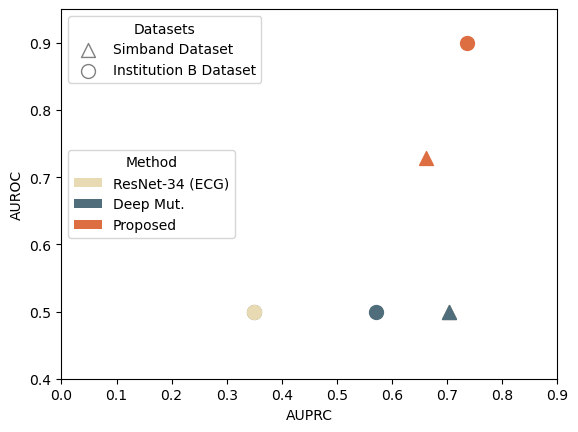

In [108]:
plt.clf()
plt.figure(figsize=(10, 10))

colors = ['#e8dab2', '#4f6d7a', '#dd6e42', '#c0d6df']
methods = [
'ResNet-34 (ECG)',
'Deep Mut.',
'SiamAF'
]

fig = plt.figure()
# fig.suptitle('ECG dataset comparison 1% training labels AUROC-AUPRC')
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.scatter(simband_ecg_pr_auc_label01[0][0], simband_ecg_roc_auc_label01[0][0], marker='^', label='Simband Dataset', c='w', edgecolor='gray', s=100)
ax1.scatter(ucla_ecg_pr_auc_label01[0][0], ucla_ecg_roc_auc_label01[0][0], marker='o', label='Institution B Dataset', c='w', edgecolor='gray', s=100)
# ax1.scatter(stanford_pr_auc, stanford_roc_auc, marker='*', label='Stanford Dataset', c='w', edgecolor='gray')

ax1.legend(title="Datasets", loc='upper left')

for i in range(len(methods)):
    edgecolors=None
    ax2.scatter(simband_ecg_pr_auc_label01[i][0], simband_ecg_roc_auc_label01[i][0], marker='^', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    ax2.scatter(ucla_ecg_pr_auc_label01[i][0], ucla_ecg_roc_auc_label01[i][0], marker='o', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
#     ax2.scatter(stanford_pr_auc[i], stanford_roc_auc[i], marker='*', label=methods[i], color=colors[i], edgecolors=edgecolors, s=100)
    
#     ax2.plot([ucla_ecg_pr_auc_label01[i][0], ucla_ecg_pr_auc_label01[i][0]], [ucla_ecg_roc_auc_label01[i][1], ucla_ecg_roc_auc_label01[i][2]], color='gray')
#     ax2.plot([ucla_ecg_pr_auc_label01[i][1], ucla_ecg_pr_auc_label01[i][2]], [ucla_ecg_roc_auc_label01[i][0], ucla_ecg_roc_auc_label01[i][0]], color='gray')
    
#     ax2.plot([simband_ecg_pr_auc_label01[i][0], simband_ecg_pr_auc_label01[i][0]], [simband_ecg_roc_auc_label01[i][1], simband_ecg_roc_auc_label01[i][2]], color='gray')
#     ax2.plot([simband_ecg_pr_auc_label01[i][1], simband_ecg_pr_auc_label01[i][2]], [simband_ecg_roc_auc_label01[i][0], simband_ecg_roc_auc_label01[i][0]], color='gray')
    
    
patches = []
for i in range(len(methods)):
    edgecolors=None          
    patches.append(mpatches.Patch(facecolor=colors[i], label=methods[i], edgecolor=edgecolors))

plt.legend(handles=patches, loc='center left', title="Method")

ax2.axis('off')
ax1.set_xlabel('AUPRC')
ax1.set_ylabel('AUROC')

ax1.set_xlim(0.0, 0.9)
ax1.set_ylim(0.4, 0.95)
ax2.set_xlim(0.0, 0.9)
ax2.set_ylim(0.4, 0.95)


# plt.show()
plt.savefig('result_plots/ecg_comparisons_1perc.png', dpi=300)